<a href="https://colab.research.google.com/github/columose/WOAH-FMD-dataset/blob/main/2_Visualise_grouped_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Save figures function
def save_fig2colab(file):
  path = r'/content/drive/MyDrive/Colab Notebooks/WOAH/Script outputs/'
  plt.savefig(path + file ,bbox_inches="tight")

In [4]:
df_clean = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WOAH/clean_data.csv')
df_clean.head()

,Unnamed: 0,Year,Semester,World region,Country,Administrative Division,Animal Category,Species,New outbreaks,Susceptible,Measuring units,Cases,Killed and disposed of,Slaughtered,Deaths,Vaccinated
0,0,2005,Jul-Dec 2005,Africa,Benin,Abomey,Domestic,Cattle,1,884,Animal,30,0,0,0,0
1,1,2005,Jul-Dec 2005,Africa,Benin,Banikoara,Domestic,Cattle,2,1202,Animal,96,0,4,78,0
2,2,2005,Jul-Dec 2005,Africa,Benin,Come,Domestic,Cattle,2,224,Animal,100,0,0,2,0
3,3,2005,Jul-Dec 2005,Africa,Benin,Djougou,Domestic,Cattle,1,54,Animal,7,0,0,0,0
4,4,2005,Jul-Dec 2005,Africa,Benin,Gogounou,Domestic,Cattle,1,252,Animal,22,0,0,0,0


In [5]:
# Arrange bar data to show the number of unique outbreaks and countries in the dataset

regions = df_clean['World region'].unique()
bar_data = []
for ireg, reg in enumerate(regions):
    countries = df_clean[df_clean['World region'] == regions[ireg]]
    outbreaks = df_clean[df_clean['World region'] == regions[ireg]]['New outbreaks'].count()
    data = [countries['Country'].nunique(), outbreaks]
    bar_data.append(data)


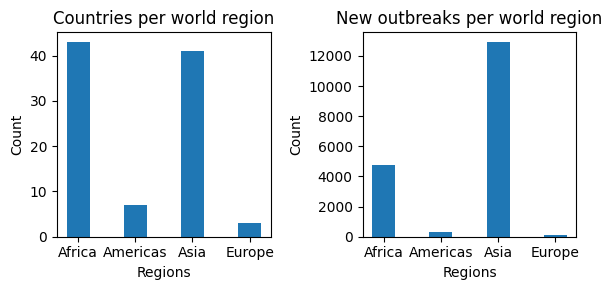

In [ ]:
# Plot barcharts for country and new outbreak count per world region

fig, axs = plt.subplots(1,2, figsize = (6,3))

vars = ['Countries per world region','New outbreaks per world region']
for ivar in range(len(vars)):
# creating the bar plot
  temp = []
  for ireg in range(len(bar_data)):
      temp.append(bar_data[ireg][ivar])


  axs[ivar].bar(regions, temp, width = 0.4)
  axs[ivar].set_title(vars[ivar])
  axs[ivar].set_xlabel('Regions')
  axs[ivar].set_ylabel('Count')


fig.tight_layout()

#save_fig2colab('Country count')
plt.show()

In [6]:
# Reorganise data by year and country for plotting purposes

grouping_vars = ['World region', 'Year']

test_vars = ['New outbreaks','Susceptible','Cases','Killed and disposed of','Slaughtered',
             'Deaths','Vaccinated']

# Convert from string to integer for accurate summation
df_clean[test_vars] = df_clean[test_vars].apply(pd.to_numeric, errors='coerce', axis=1)

# Group data
df_grouped = df_clean.groupby(grouping_vars)[test_vars].sum()

In [7]:
# Data is now grouped by World region and Year. Better for visualising and analysing
df_grouped.head()

New outbreaks  Susceptible  Cases  Killed and disposed of  \
World region Year                                                              
Africa       2005            616       600684  23757                      44   
             2006            563       646549  62550                    1186   
             2007            399       681985  34835                     133   
             2008            542     14565186  52115                    1620   
             2009            529      7548535  34594                      82   

                   Slaughtered  Deaths  Vaccinated  
World region Year                                   
Africa       2005          146     874       94247  
             2006         7169    1941      817491  
             2007          514     900     1053980  
             2008          256     636      725737  
             2009          358     556      903037

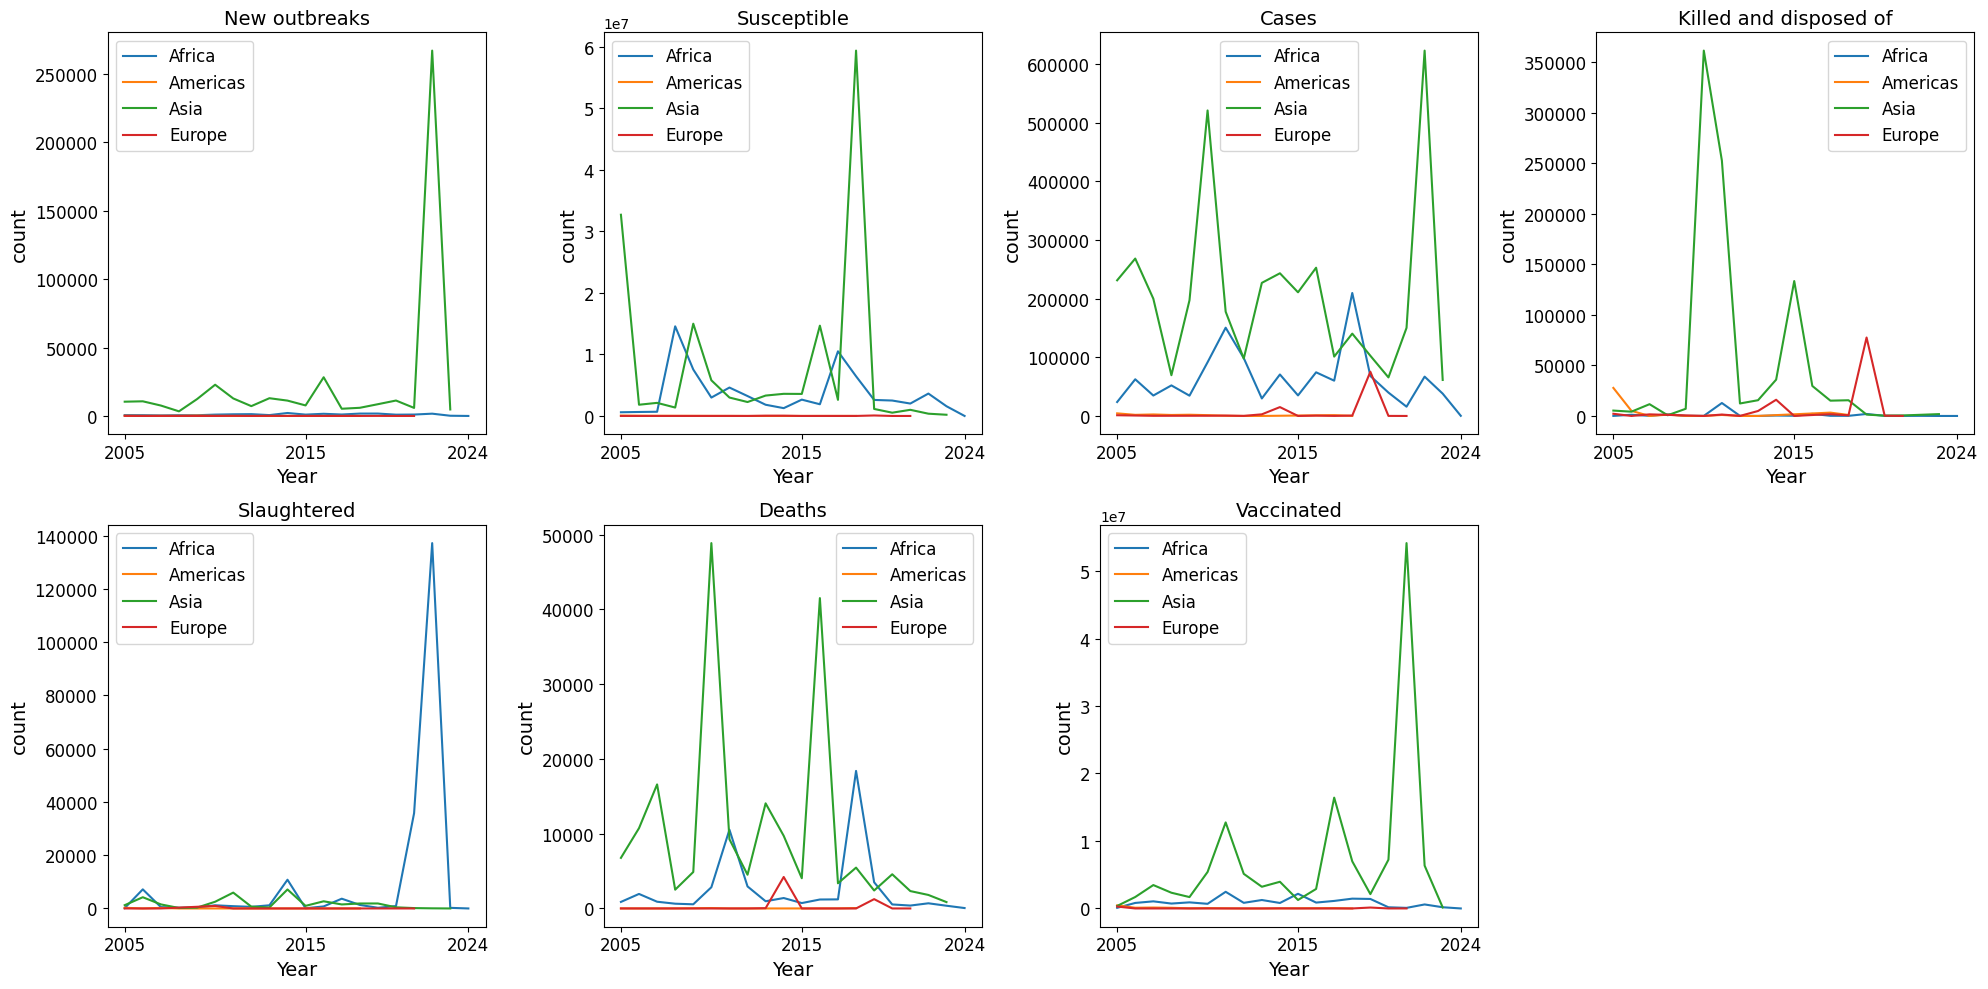

In [10]:
# Plot subplots for each test variable comparing the count rates between world regions over time

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

# This is a bit tedious but fewer tick marks will improve legibility
all_years = df_grouped.index.get_level_values('Year').astype(int).unique()
year_1 = all_years[0]
year_end = all_years[-1]
year_mid = all_years[len(all_years)//2]
year_ticks = [year_1, year_mid, year_end]

# Plot the time series for each world region
for ivar, name in enumerate(test_vars):
    for region, region_data in df_grouped.groupby('World region')[name]:
        years = region_data.index.get_level_values('Year').astype(int) # obtain years variable in loop as it changes per variable
        axs[ivar].plot(years, region_data, label=region)
        axs[ivar].set_xticks(year_ticks)

# Set labels and titles
for ivar, ax in enumerate(axs[:7]): # Because we only have 7 axes
      ax.set_ylabel('count', fontsize = 14)
      ax.set_xlabel('Year',fontsize = 14)
      ax.set_title(test_vars[ivar], fontsize = 14)
      ax.set_xticklabels(ax.get_xticks())
      ax.tick_params(axis='both', which='major', labelsize=12)
      ax.legend(fontsize = 12)

fig.delaxes(axs[7]) # Delete axis in position 2,4 that contained no data
plt.tight_layout()

file = 'Grouped time-series plot.png'
#save_fig2colab(file)

plt.show()

**Observations**
1. Asia had a spike in foot and mouth disease outbreaks around 2022, coupled with an increase in cases and vaccines.
2. Asia has had two clear peaks in foot and mouth disease cases and deaths, one around 2010, another around 2022. The two peaks might be related.
3. Africa had a rather startling peak in slaughtering animals in 2022. It doesn't seem like there was a rise in foot and mouth disease cases that year.
4. It is very difficult to observe trends for Europe and Oceania as their counts are so low. Therefore, the data should be converted to percentages relative to a baseline to better visualise trends within world regions.

In [ ]:
# Save grouped file to drive
#df_grouped.to_csv('/content/drive/MyDrive/Colab Notebooks/WOAH/grouped_data.csv')

**Follow-up on the slaughtering outlier in Africa**



In [ ]:
# Create slaughter dataframe
df_slaughter = df_clean.sort_values(by = ['Slaughtered'],axis = 0, ascending = False).head()

# Define relevant variables
slaught_yrs = df_slaughter['Year']
slaught_country = df_slaughter['Country']
slaught_data = df_slaughter['Slaughtered']
id = df_slaughter['Unnamed: 0']

print(slaught_country)

17068    South Africa
16577    South Africa
17625    South Africa
17630    South Africa
17080    South Africa
Name: Country, dtype: object


In [ ]:
# Prepare data for bar chart
all_data=[]
events = []
for event in range(len(slaught_yrs)):
  events.append(f'SA, {slaught_yrs.iloc[event]} , id = {id.iloc[event]}')
  all_data.append(slaught_data.iloc[event])

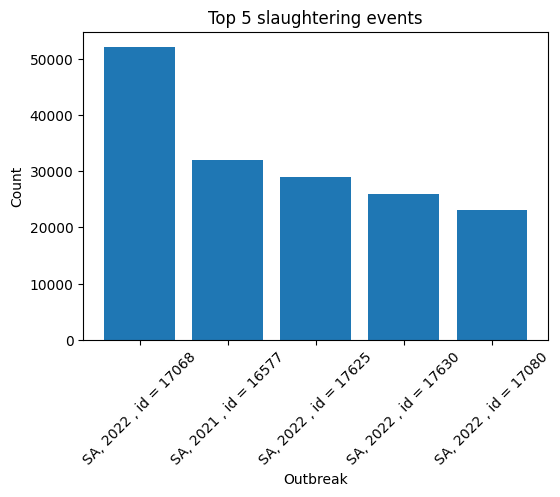

In [ ]:
# Plot figure
fig = plt.figure(figsize = (6,4))

plt.bar(events, all_data)
plt.title('Top 5 slaughtering events')
plt.xlabel('Outbreak')
plt.ylabel('Count')
plt.xticks(rotation = 45)

#save_fig2colab('Top 5 slaughtering')
plt.show()

